### Video Link : https://drive.google.com/file/d/1Af_jacu4zM20e3KSEQc2g0QBgvDD_DGt/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
nltk.download('stopwords')
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Reading Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data_news - data_news.csv")
df.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [4]:
df.drop('links',axis=1,inplace=True)

In [5]:
df.head()

,category,headline,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made","If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [6]:
df['text'] = df['headline'] + " " + df['short_description'] + " " + df['keywords']

In [7]:
df.head()

,category,headline,short_description,keywords,text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,Resting is part of training. I've confirmed wh...,running-lessons,143 Miles in 35 Days: Lessons Learned Resting ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,Talking to Yourself: Crazy or Crazy Helpful? T...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,Crenezumab: Trial Will Gauge Whether Alzheimer...
3,WELLNESS,"Oh, What a Difference She Made","If you want to be busy, keep trying to be perf...",meaningful-life,"Oh, What a Difference She Made If you want to ..."
4,WELLNESS,Green Superfoods,"First, the bad news: Soda bread, corned beef a...",green-superfoods,"Green Superfoods First, the bad news: Soda bre..."


In [8]:
df1 = df.drop(['headline','short_description','keywords'],axis=1)

In [9]:
df1.head()

,category,text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned Resting ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful? T...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...
3,WELLNESS,"Oh, What a Difference She Made If you want to ..."
4,WELLNESS,"Green Superfoods First, the bad news: Soda bre..."


### EDA AND FEATURE ENGINEERING

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  50000 non-null  object
 1   text      47332 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
df1.describe()

,category,text
count,50000,47332
unique,10,43370
top,WELLNESS,"Bryce Harper, Hunter Strickland Suspended Afte..."
freq,5000,8


<Axes: xlabel='category', ylabel='count'>

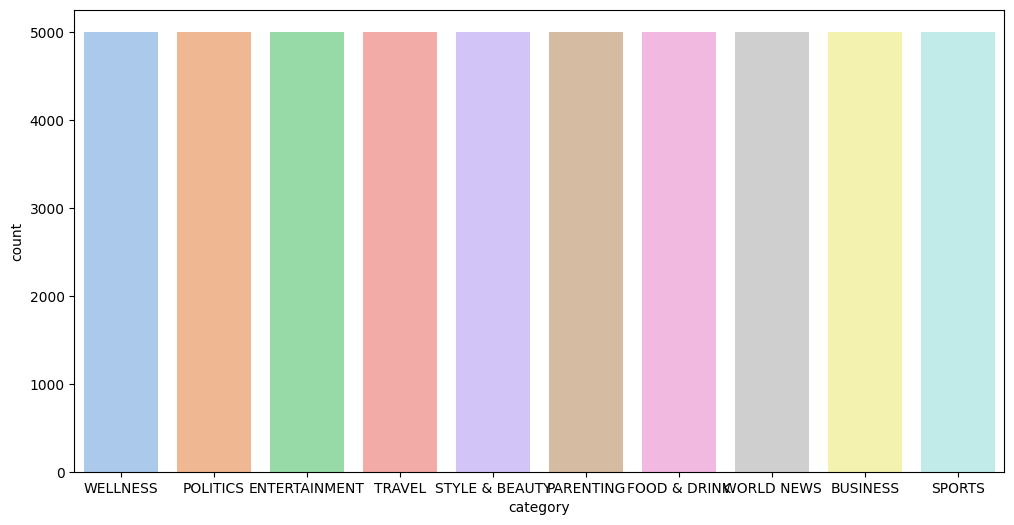

In [12]:
palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='category', palette=palette)

In [13]:
df1['category'].value_counts()

,count
category,
WELLNESS,5000
POLITICS,5000
ENTERTAINMENT,5000
TRAVEL,5000
STYLE & BEAUTY,5000
PARENTING,5000
FOOD & DRINK,5000
WORLD NEWS,5000
BUSINESS,5000


In [14]:
df1.isna().sum()

,0
category,0
text,2668


In [15]:
df1.shape

(50000, 2)

In [16]:
df1['text'] = df1['text'].fillna(df1['text'].mode()[0])

In [17]:
df1.isna().sum()

,0
category,0
text,0


### Special character removal

In [18]:
def remove_special_chars(text):
    text = text.lower()
    return re.sub(r'[^a-zA-Z#]', ' ', text)

df1['clean_text'] = df1['text'].apply(remove_special_chars)

### Wordcloud

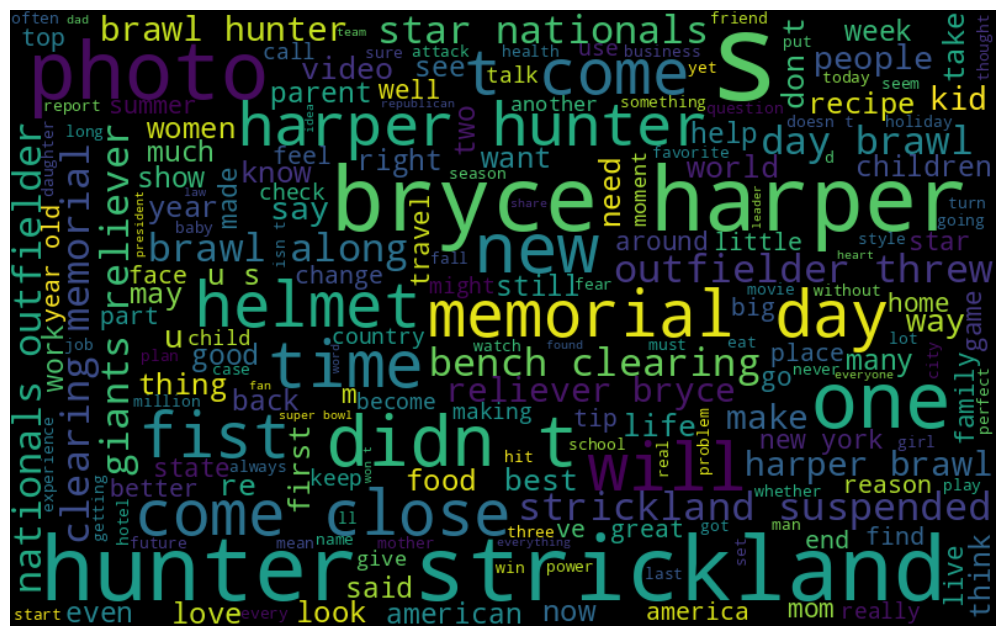

In [19]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df1['clean_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
df1.head()

,category,text,clean_text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned Resting ...,miles in days lessons learned resting ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful? T...,talking to yourself crazy or crazy helpful t...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,crenezumab trial will gauge whether alzheimer...
3,WELLNESS,"Oh, What a Difference She Made If you want to ...",oh what a difference she made if you want to ...
4,WELLNESS,"Green Superfoods First, the bad news: Soda bre...",green superfoods first the bad news soda bre...


### Stopwords removal

In [21]:
stop_words = stopwords.words('english')
df1['clean_text'] = df1['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

### Tokenization

In [22]:
allsent = []
for sentence in df1['clean_text']:
    sent = sentence.split()
    allsent.append(sent)

In [23]:
tokens = pd.DataFrame({'tokens': allsent})
df1 = pd.concat((df1,tokens),axis=1)
df1.head()

,category,text,clean_text,tokens
0,WELLNESS,143 Miles in 35 Days: Lessons Learned Resting ...,miles days lessons learned resting part traini...,"[miles, days, lessons, learned, resting, part,..."
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful? T...,talking crazy crazy helpful think talking tool...,"[talking, crazy, crazy, helpful, think, talkin..."
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,crenezumab trial gauge whether alzheimer drug ...,"[crenezumab, trial, gauge, whether, alzheimer,..."
3,WELLNESS,"Oh, What a Difference She Made If you want to ...",oh difference made want busy keep trying perfe...,"[oh, difference, made, want, busy, keep, tryin..."
4,WELLNESS,"Green Superfoods First, the bad news: Soda bre...",green superfoods first bad news soda bread cor...,"[green, superfoods, first, bad, news, soda, br..."


In [24]:
df1.isna().sum()

,0
category,0
text,0
clean_text,0
tokens,0


### Stemming

In [25]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
df1['tokens'] = df1['tokens'].apply(lambda sentence: [stemmer.stem(word) for word in sentence])
df1.head()

,category,text,clean_text,tokens
0,WELLNESS,143 Miles in 35 Days: Lessons Learned Resting ...,miles days lessons learned resting part traini...,"[mile, day, lesson, learn, rest, part, train, ..."
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful? T...,talking crazy crazy helpful think talking tool...,"[talk, crazi, crazi, help, think, talk, tool, ..."
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,crenezumab trial gauge whether alzheimer drug ...,"[crenezumab, trial, gaug, whether, alzheim, dr..."
3,WELLNESS,"Oh, What a Difference She Made If you want to ...",oh difference made want busy keep trying perfe...,"[oh, differ, made, want, busi, keep, tri, perf..."
4,WELLNESS,"Green Superfoods First, the bad news: Soda bre...",green superfoods first bad news soda bread cor...,"[green, superfood, first, bad, news, soda, bre..."


In [26]:
df1['content'] = df1['tokens'].apply(lambda x: " ".join(x))

In [27]:
df1.head()

,category,text,clean_text,tokens,content
0,WELLNESS,143 Miles in 35 Days: Lessons Learned Resting ...,miles days lessons learned resting part traini...,"[mile, day, lesson, learn, rest, part, train, ...",mile day lesson learn rest part train confirm ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful? T...,talking crazy crazy helpful think talking tool...,"[talk, crazi, crazi, help, think, talk, tool, ...",talk crazi crazi help think talk tool coach ch...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,crenezumab trial gauge whether alzheimer drug ...,"[crenezumab, trial, gaug, whether, alzheim, dr...",crenezumab trial gaug whether alzheim drug pre...
3,WELLNESS,"Oh, What a Difference She Made If you want to ...",oh difference made want busy keep trying perfe...,"[oh, differ, made, want, busi, keep, tri, perf...",oh differ made want busi keep tri perfect want...
4,WELLNESS,"Green Superfoods First, the bad news: Soda bre...",green superfoods first bad news soda bread cor...,"[green, superfood, first, bad, news, soda, bre...",green superfood first bad news soda bread corn...


In [28]:
df1.drop(['text','clean_text','tokens'],axis=1,inplace=True)

In [29]:
df1.head()

,category,content
0,WELLNESS,mile day lesson learn rest part train confirm ...
1,WELLNESS,talk crazi crazi help think talk tool coach ch...
2,WELLNESS,crenezumab trial gaug whether alzheim drug pre...
3,WELLNESS,oh differ made want busi keep tri perfect want...
4,WELLNESS,green superfood first bad news soda bread corn...


### Label Encoding Sentiment

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['category'] = encoder.fit_transform(df1['category'])

In [31]:
df1.head()

,category,content
0,8,mile day lesson learn rest part train confirm ...
1,8,talk crazi crazi help think talk tool coach ch...
2,8,crenezumab trial gaug whether alzheim drug pre...
3,8,oh differ made want busi keep tri perfect want...
4,8,green superfood first bad news soda bread corn...


### Data Splitting

In [32]:
from sklearn.model_selection import train_test_split as tts

In [33]:
X = df1['content']
y = df1['category']

In [34]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=42)

### Vectorization

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()
X_train_tfidf = X_train_tfidf.reshape((X_train_tfidf.shape[0], 1, X_train_tfidf.shape[1]))
X_test_tfidf = X_test_tfidf.reshape((X_test_tfidf.shape[0], 1, X_test_tfidf.shape[1]))

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam


In [39]:
model = Sequential([
    Input(shape=(1, X_train_tfidf.shape[2])),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')  # Adjust output layer
])

# Compile Model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [40]:
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4335 - loss: 1.6358 - val_accuracy: 0.7347 - val_loss: 0.8475
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7784 - loss: 0.7048 - val_accuracy: 0.7567 - val_loss: 0.7819
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8316 - loss: 0.5419 - val_accuracy: 0.7562 - val_loss: 0.7876
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8516 - loss: 0.4647 - val_accuracy: 0.7555 - val_loss: 0.8372
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8737 - loss: 0.3899 - val_accuracy: 0.7511 - val_loss: 0.9004
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8850 - loss: 0.3467 - val_accuracy: 0.7533 - val_loss: 0.9645
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8958 - loss: 0.3048 - val_accuracy: 0.7510 - val_loss: 1.0529
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9042 -

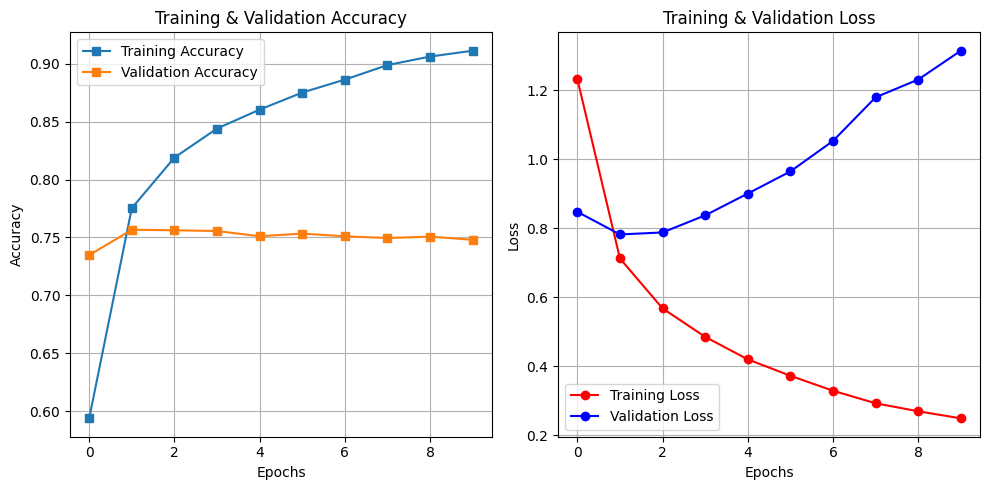

In [41]:
history_dict = history.history

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy', marker='s')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss', marker='o', color='red')
plt.plot(history_dict['val_loss'], label='Validation Loss', marker='o', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [42]:
y_pred_probs = model.predict(X_test_tfidf)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [43]:
y_pred_classes

array([2, 4, 8, ..., 5, 0, 7])

#### Conclusion for Model 1 :
LSTM model is having very high validation loss but training loss is very low OR training accuracy is very high as compared to validation here model is **OVERFITTED**

### Logistic Regression

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
vectorizer = TfidfVectorizer()

In [46]:
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression()
model = lr.fit(X_train_vector,y_train)
y_pred = model.predict(X_test_vector)

In [49]:
from sklearn.metrics import *
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7955333333333333
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1479
           1       0.82      0.79      0.80      1483
           2       0.88      0.85      0.87      1545
           3       0.58      0.82      0.68      1492
           4       0.81      0.72      0.76      1529
           5       0.89      0.87      0.88      1492
           6       0.87      0.81      0.84      1481
           7       0.83      0.81      0.82      1498
           8       0.78      0.76      0.77      1535
           9       0.81      0.81      0.81      1466

    accuracy                           0.80     15000
   macro avg       0.81      0.80      0.80     15000
weighted avg       0.81      0.80      0.80     15000

[[1060   20   23  157   71   15   15   21   65   32]
 [  28 1166   13   88   41   38   41   22   26   20]
 [  17   16 1316   60    4   13   17   63   34    5]
 [  26   32   15 1223   26   20   28   21   93    8]
 [  81   3

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier


In [51]:
forest = RandomForestClassifier()
model = forest.fit(X_train_vector,y_train)
y_pred = model.predict(X_test_vector)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7337333333333333
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1479
           1       0.71      0.69      0.70      1483
           2       0.76      0.84      0.80      1545
           3       0.54      0.79      0.64      1492
           4       0.76      0.62      0.68      1529
           5       0.86      0.85      0.85      1492
           6       0.81      0.78      0.79      1481
           7       0.77      0.69      0.73      1498
           8       0.71      0.65      0.68      1535
           9       0.74      0.72      0.73      1466

    accuracy                           0.73     15000
   macro avg       0.74      0.73      0.74     15000
weighted avg       0.74      0.73      0.74     15000

[[1049   36   25  158   52   22    9   12   68   48]
 [  24 1023   48  139   44   45   67   28   38   27]
 [  18   38 1295   62    7   19   28   43   27    8]
 [  19   35   35 1181   27   18   37   24   97   19]
 [  63   6

### Support Vector Machine

In [52]:
from sklearn.svm import SVC

In [53]:
svc = SVC()
model = svc.fit(X_train_vector,y_train)
y_pred = model.predict(X_test_vector)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8072666666666667
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1479
           1       0.79      0.82      0.81      1483
           2       0.89      0.86      0.87      1545
           3       0.58      0.83      0.68      1492
           4       0.83      0.73      0.77      1529
           5       0.93      0.87      0.90      1492
           6       0.89      0.81      0.85      1481
           7       0.84      0.81      0.83      1498
           8       0.79      0.76      0.77      1535
           9       0.82      0.82      0.82      1466

    accuracy                           0.81     15000
   macro avg       0.82      0.81      0.81     15000
weighted avg       0.82      0.81      0.81     15000

[[1128   23   11  153   56    8    6   13   52   29]
 [  19 1218    9   93   32   17   37   18   23   17]
 [  11   30 1326   59    5    7   15   55   34    3]
 [  19   39   13 1233   26   14   25   18   96    9]
 [  70   4

### Prediction Function

In [54]:
def text_preprocessing_and_prediction(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z#]', ' ', text)
    text_transformed = []
    for word in text.split():
        stem = stemmer.stem(word)
        text_transformed.append(stem)
    text_transformed = " ".join(text_transformed)
    filtered_text = [word for word in text_transformed.split() if word.lower() not in stop_words]
    text_transformed = " ".join(filtered_text)
    print(text_transformed)
    test_input = vectorizer.transform([text_transformed])
    result = model.predict(test_input)[0]
    return result

In [55]:
text ="Talking to Yourself: Crazy or Crazy Helpful? T"

In [56]:
print(text_preprocessing_and_prediction(text))

talk crazi crazi help
3


## Conclusion
1. LSTM accuracy is overfitted
2. Logistic Regression : Accuracy 79%
3. Random Forest : Accuracy 73%
4. Support Vector Machine : Accuracy 80%

Not So much difference in accuracy of Logistic regression and SVC and hence choosing **SVC** as the most optimatl model